# FYS-STK4155 – Project 1: Regression analysis and resampling methods

##### Authors: Adele Zaini, Gaute Arnesson Holen, Fridtjof Gjengset
##### Date: 11. October, 2021

## Before we start: 

After a general introduction and some theoretical background with elements shared and useful for each exercise, we move more deeply into the explanation and presentation of each task.

### General introduction

In this first project we were asked to explore the techniques of Regression, as the basic step to go further deeply into Machine Learning, and the resampling methods, such as Bootstrap and Cross-validation, while perfoming a Bias-variance decomposition analysis.

In order to set up all our regression and resampling methods, we started working with a vanilla dataset given by the Franke function, depending of two independent variables $x$ and $y$, with an added stochastic noise. At the end, we performed the code with a real dataset taken from a terrain survey.

**Franke's function** is a weighted sum of four exponentials:

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function is defined for $x,y\in [0,1]$.

<right><img src="img/FrankeFunction.png" width="650"></right>

### Theoretical background

*Note: the explanation is given assuming a two-dimensional problem, in order to emphathise the physical idea and not to overwhelm the explanation of indexes little useful for the understanding. Just consider inputs $x$ as both indipendent variables $(x,y)$ and the outputs $y$ as the third dimension $z$. Relevant differences will be pointed out through notes.*

Given the two datasets of inputs $x=[x_0,x_1,...x_{n-1}]$ and the outputs $y=[y_0,y_1,...y_{n-1}]$, we perform a polynomial fit of this function using Regression methods with the following **basic assumption**. There exists a continuous function (some degree-order polynomial) $f(x)$ s.t. we can interpret the outputs as **$y(x)=f(x)+\epsilon$**. Basically we are splitting the outputs into a deterministic component, our model, and a stochastic error contribution $\epsilon$. Also, an importnant assumption is given by this error $\epsilon$ that we assume normally distributed with $\mu=0$ and variance $\sigma^2$ ($\epsilon \sim \cal{N}(0,1)$).

So now assuming that the $f(x)$ can be approximated as a polynomial of $k$ degree, we get the following expression:

$$
y=y(x) \ \ \rightarrow \\ y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{k-1} \beta_j x_i^j+\epsilon_i, \\ \forall i=0,...n
$$

So that our model $\boldsymbol{\tilde{y}}$ (i.e. without the stochastic component) can be rewritten in a matricial notation:

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$
where $X$ is called *Design matrix* with $n$ rows and columns depending on the degree of the polynomial. While $\beta$ is the estimator vector of the coefficients of our regression. 

*Note: in the three-dimensional problem, each row of the design matrix would look like $X_{i*}=[x_i, y_i,
x_i^2, y_i^2, x_iy_i, \dots]$. If the polynomial is of degree $k$ than our model will have $k'=\frac{(k+1)(k+2)}{2}$ ($k>0$) feutures, that means $k'$ columns of the design matrix and elements in $\beta$. The design matrix is then $(n \ \text{x} \ k')$.*

We need to find the optimal $\hat{\beta}$ that is the one that minimizes the cost function $C(X,\beta)$ (i.e. the "difference" between our data and the model we are choosing). In our own case, the $MSE$ is taken as cost function:
$$
C(X,\beta)=MSE(X,\beta)=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-X_{i*}\beta\right)^2
$$


The expression of the optimal $\hat{\beta}$ depends on the regression methods choosen. Here we explore the Linear (Ordinary Least Square, OLS), Ridge and Lasso Regression. For further details, see the introduction of the respective exercise.


### Code structure

The code is structured into libraries (e.g. `regression.py`), which gather all the functions needed for solving the various tasks, while the specific task codes are in `task*.py` files.

In the course of this notebook, we inserted runnable cells to run the task codes directly and dynamically from here to show up the results, e.g.:

```
%run ./1project/task1.py
```


After a brief introduction, we will explain the algorithm, show the results and comment on them.

*Note: a further improvement to the code would be structuring as **object-oriented**. We have started converting the code but by the time of the deadline it was not ready to be runnable yet.*

## Exercise 1: Ordinary Least Square (OLS) on the Franke function

### Introduction
In this task we are asked to write our own code to perfom a standard least square regression analysis using polynomials in $x$ and $y$ up to fifth order. 

### <font color=purple>Ordinary Least Square Equation</font>
For the OLS Regression, the formula for the optimal $\hat{\beta}$ is the following (*Ordinary Least Square Equation*):

$$\hat{\beta}_{OLS} = (X^T X)^{-1}X^T z$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{OLS}$.

### <font color=purple>Error analysis</font>
To access the quality of the model, we perfom an error analysis, involving the Mean Square Error ($MSE$) and the $R^2$ score function:

$$
MSE(\hat{z},\hat{\tilde{z}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(z_i-\tilde{z}_i)^2,
$$

$$
R^2(\hat{z}, \tilde{\hat{z}}) = 1 - \frac{\sum_{i=0}^{n - 1} (z_i - \tilde{z}_i)^2}{\sum_{i=0}^{n - 1} (z_i - \bar{z})^2},
$$

where $\tilde{z}_i$ is the predicted value of the $i-th$ sample, $z_i$ is the corresponding true value and $\bar{z}$ is the mean value given by $ \bar{z} =  \frac{1}{n} \sum_{i=0}^{n - 1} z_i$.

### <font color=purple>Confidence interval</font>

The Confidence Interval gives a range of possible values for an unknown parameter, in own task that is the estimators $\beta$. This confidence interval is then associated with a cumulative probability, which indicates the probability that the random event described by the aleatory variable falls within this confidence interval. Graphically speaking, this is equal to the area subtended by the probability distribution curve of the aleatory variable in the interval considered. A confidence level of $95\%$ is commonly used and it is normally referred to as a *two-$\sigma$* confidence level.

<right><img src="img/ConfidenceInterval.png" width="500"></right>

Assuming that our estimators $\beta_i$ follow a normal distribution, we evaluate the confidence interval thanks to the following formula:

$$
CI=\left(\mu_{\beta_j}\pm \frac{z\sigma_{\beta_j}}{\sqrt{n}}\right),
$$

where $\mu_{\beta_j}$ is the unbiased value of $\beta_j$, $n$ is the number of datapoints, $z$ defines the level of certainty (taken a $z=1.96$ it corresponds to a confidence of $95\%$), while $\boldsymbol{\sigma_{\beta_j}}^2=var(\boldsymbol{\beta_j})$ is the variance of $\beta_j$ evaluated throught the espression:

$$\boldsymbol{\sigma_{\beta_j}}^2 = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $$

where $\sigma$ is the standard deviation of the dataset distribution, which in our case corresponds to the standard deviation of the stochastic error ($z_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, further details on the statics in the [lecture notes](https://compphysics.github.io/MachineLearning/doc/pub/week36/html/week36.html)).

*Note: each of the $\beta$-values has its own confidence interval.*



### Algorithm

First of all, we create our vanilla dataset using the FrankeFunction espression, $n=25$ datapoints and an error distributed as $\epsilon \sim \cal{N}(0,0.1)$. Then we create the design matrix $X$ for a polynomial of degree 5 and we split the data into a 80% training and 20% test datasets. This datasets are then rescaled subtracting the mean value and we perfom a Ordinary Least Square regression to have the model outputs ($z$ values from the training data) and the prediction ones ($z$ values from the test data). The matrix pseudoinverse provided by *numpy* is used to evaluate the inverse in the OLS equation, even when this is singular. The error analysis is then applied to both the training and test outputs and the confidence interval of the $\beta$ estimetors is evaluated.

<font color=purple>**rescaling: You should present a critical discussion of why and how you have scaled or not scaled the data**</font>

The library called `regression.py` contains all the functions needed for this exercise, while the main code is in `task1.py`. The functions used to solve this exercise are:

- `FrankeFunction(x,y)`: evaluate the Franke function from the values $x$ and $y$.
- `create_xyz_dataset(n,mu, sigma)`: create the inputs $(x,y)$ and output $z$ datasets with $n^2$ datapoints and use the `FrankeFunction(x,y)` adding a stochastic normally distrbuted noise $\epsilon \sim \cal{N}(\mu,\sigma)$.
- `Plot_frankefunction(x,y,z)`: create a 3d plot suitable for displaying the Franke function.
- `create_X(x,y,n)`: create the design matrix from the the two indipendent variables $x$ and $y$ with a complexity (i.e. degree of polynomial, feutures) $n$.
- `Split_and_Scale(X,z,test_size=0.2, scale=True)`: split the dataset, using *train_test_split* from Scikit-Learn, into a training and test datasets in a fraction given by a *test_size* (default value *0.2*). Scaling the data is optional, according the problem. The default boolean argument is *scale=True* and it uses the *StandardScaler(with_std=False)* from Scikit-Learn to subtract the mean value from the dataset. 
- `OLS_solver(X_train, X_test, z_train, z_test)`: evaluate the OLS equation through matix inversion and return the optimal $\hat{\beta}$ values, our model $\tilde{z}$ ($z$ values from the training data) and our prediction ($z$ values from the test data). 
- `MSE(z_data, z_model)`: calculate the mean square error of a dataset compared to a model or prediction.
- `R2(z_data,z_model)`: calculate the R2 score of a dataset compared to a model or prediction.
- `Confidence_Interval(beta, X, sigma=1)`: evaluate the confidence interval of $\beta$ values through the their variance and the standard deviation of the model (default value is *1*) with a 95% certainty.

### Results

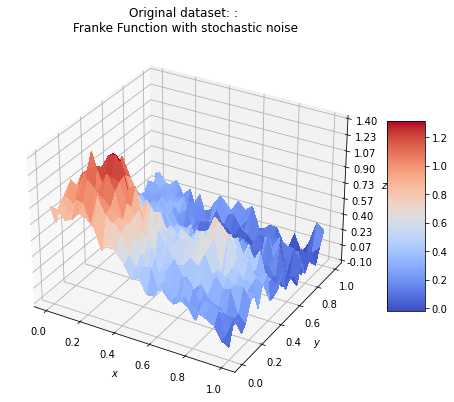

––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0115
Test MSE: 0.0154
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8743
Test R2: 0.839
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,8.761,8.764,8.767
2,4.463,4.466,4.469
3,-41.684,-41.669,-41.655
4,-18.596,-18.584,-18.573
5,-13.007,-12.993,-12.980
6,68.067,68.098,68.130
7,52.103,52.127,52.151
8,28.833,28.856,28.879
9,1.904,1.935,1.966


––––––––––––––––––––––––––––––––––––––––––––


In [7]:
%run ../1project/task1.py

### Comments

The $MSE$ is very close to 0 and $R^2$ tends to 1 for both training and testing datasets. This shows a very good behaviour of our model, as a fit of a fifth order polynomial.

The confidence interval of $\beta$ shows that for each estimator the range is very small, meaning that the variance is not high and the model is performing well, not going into overfitting.

## Exercise 2: Bias-variance trade-off and resampling techniques

### Introduction

This exercise focuses on studying the bias-variance trade-off by implementing the *bootstrap* resampling technique.

### <font color=purple>MSE VS complexity</font>

First of all we are asked to analyse the MSE both for training and testing data as a function of complexity (i.e. degree of fitting polynomial), in order to identify the best complexity. The question is: *which is the best complexity then?*

Let's consider the following picture, taken from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf):

<right><img src="img/MSE_complexity.png" width="500"></right>

Considering the testing MSE, we expect that it tends to 0, because we are tuning our model on the training dataset and the "difference" between the real data and our model tends to 0 when complexity increases. Considering instead the test MSE, it show a U-behaviour, getting to an increase when reaching a certain value of complexity. This means we are overfitting. Testing the model on new fresh data allows us to check if the model is "over-complex" and tends to pass through every single datapoint without considering and buffering the stochastic noise, as it should be. Here is a picture showing case of **underfitting and overfitting**:

<right><img src="img/Under_Overfitting.png" width="700"></right>

This is exactly the reason why we need to split in training and testing datasets. 

It is also possible to appreciate the regions of low/high bias and variance, it will be clearer after the Bias-Variance tradeoff analysis explanation.

So *which is the best complexity then?* The best complexity corresponds to the **minimum of the test MSE curve**.

### <font color=purple>Bootstrap and resampling techniques</font>

Resampling techniques are used to have more robust outputs from the model analysis. This means that if we want to evaluate the MSE, doing it once may not be sufficient to investigate the real bahaviour of the model. The basic idea is **resampling and reshuffling the dataset, then performing the algorithm on this "new" dataset for $b$ times, having then a probability distribution of the estimator we want to investigate** (in our case this is the optimal $\hat{\beta}$). 

This is a way to "by-pass" the fact that we have a limited dataset to realize our model, while at the same time making everything less sensible to stochastic fluctuations in this realization.

**Bootstrap algorithm**:

Given a domain $D=[x_1,x_2, \dots, x_n]$,
1. Draw a bootstrap sample $[x_1^*,x_2^*, \dots, x_n^*]$ randomly selecting from domain;
2. Compute $\hat{\beta}^*=g(x_1^*,x_2^*, \dots, x_n^*)$ with the proper function $g(x_j)$ (in our case is the OLS equation);
3. Repeat the previous steps b-times, yielding the set of estimators {$\hat{\beta}^*_1,\hat{\beta}^*_2,\dots,\hat{\beta}^*_b$};
4. Now it is possible to draw the histogram and can apply all the statistics we need to investigate the statistical properties of out estimator $\hat{\beta}$. 

Here is an example of the bootstrap resampling tecnique as demonstration of the *central limit theorem* ($z\rightarrow\mu$ and $\sigma_z\rightarrow\sigma/\sqrt{b}$ as datapoints $N\rightarrow\infty$).

<right><img src="img/Bootstrap.png" width="500"></right>

### <font color=purple>Bias-Variance Tradeoff Analysis</font>

The bias–variance tradeoff is a way of analyzing a learning algorithm's expected error (e.g. $MSE$) as a sum of three terms: the bias, variance, and a quantity called the *irreducible error*, which is usually the variance $\sigma^2$ of the noise $\epsilon$ distribution.

$$
MSE=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=bias^2+variance+\sigma^2.
$$

where:

$$
bias^2=\mathrm{Bias}^2(\boldsymbol{f},\boldsymbol{\tilde{y}})=\mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
variance=\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]=\mathbb{E}\left[(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
\sigma^2=\mathbb{E}\left[(\boldsymbol{\epsilon}-\mathbb{E}\left[\boldsymbol{\epsilon}\right])^2\right]=\mathbb{E}\left[\boldsymbol{\epsilon}^2\right]
$$


<font color=purple>**Prove the equation:**</font>

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$ and the mean value of $\boldsymbol{\epsilon}$ is by equal to zero. Furthermore, the function $f$ and $\boldsymbol{\tilde{y}}$ are not stochastic variables.

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

Reorganizing the espression we get
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=
\mathbb{E}\left[(\boldsymbol{f} -\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+
\mathbb{E}\left[(-(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]))^2\right]+
\mathbb{E}\left[(\boldsymbol{\epsilon})^2\right],
$$

And so the three terms of the previous expression.

<font color=purple>**Meaning of the bias and variance terms:**</font>
- **Bias**: is the error we get when assuming a model. It is the "distance" between the real function $f$ and the model $\tilde{y}$ and highlights the erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (*underfitting*).
- **Variance**: shows how much the model outputs are spread. High variance may result from an algorithm modeling the stochastic noise in the training data (*overfitting*).

<center><img src="img/Bias_Variance.png" width="900"></center>

Our aim is then get a low bias and a low variance, that corresponds indeed with the minimum of the error (i.e. $MSE_{test}$). In the right graph, we can appreciate the dependance to complexity and the areas of the underfitting and overfitting with bias and variance decomposed. In this case the best complexity is in the range $[8,10]$.

### Algorithm

OLS

Firstly, the $MSE$ is explored as function of complexity, in particular when dividing the dataset into training and test data, in order to find the optimal "complexity" (i.e. degree of polynomial) without exceding in overfitting. To get a better extimation of the $MSE$ it has been coupled with resampling methods, and to have a better understanding and deeper comprehension, a bias-variance tradeoff analysis has been performed.


We can reproduce figure. 2.11 from Hastie, Tibshiani and Friedman, by plotting the MSE as a function of the complexity of the model. By using the same x, y and z values, we calculate the designmatrix **X** with a complexity from n=2 to n=20, where n is the compexity/degree og the polynomial. For each designmtrix we find the OLS and calcualte the MSE for the test and training data. We import the function **plot_ols_complexity**(x, y, z, complexity) from the linear_regression library, which does exactly this. It's default valye for complexity is set to **range(2,20)**. After importing **plot_ols_complexity()** we can therefore simply write:

- `FrankeFunction(x,y)`:

### Results

We can reproduce figure. 2.11 from Hastie, Tibshiani and Friedman, by plotting the MSE as a function of the complexity of the model. By using the same x, y and z values, we calculate the designmatrix **X** with a complexity from n=2 to n=20, where n is the compexity/degree og the polynomial. For each designmtrix we find the OLS and calcualte the MSE for the test and training data. We import the function **plot_ols_complexity**(x, y, z, complexity) from the linear_regression library, which does exactly this. It's default valye for complexity is set to **range(2,20)**. After importing **plot_ols_complexity()** we can therefore simply write:

In [ ]:
from linear_regression import plot_ols_complexity
complexity = range(2,20)
plot_ols_complexity(x,y,z,complexity)

Initially the MSE for both test and train decreases as out model imporves with the complexity of the polynomial. Around a polynomial of the 5th degree, we can see that the MSE for the test data increases, while the MSE for the train data continues to decrease. This is beacuse the increased complexity of the designmatrix causes overfitting. Out model therefore fits the training data better, but gives a poor model for the test data, because it has overfitted to the training set. It seems out model does best around a complexity of n=5.


Part 1: $MSE_{train}$ and $MSE_{test}$ in function of the complexity of the model (degree-order of polynomial) 



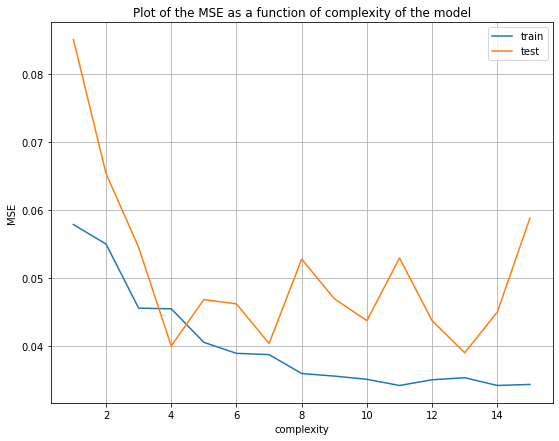

Part 2: perform a bias-variance tradeoff analysis 

Train datapoints: 500
Test datapoints: 125
Error: 0.1270905212590576
Bias^2: 0.1270905212590576
Var: 0.0
0.1270905212590576 >= 0.1270905212590576 + 0.0 = 0.1270905212590576
Error: 0.08940690636027797
Bias^2: 0.08917258505933694
Var: 0.00023432130094104152
0.08940690636027797 >= 0.08917258505933694 + 0.00023432130094104152 = 0.08940690636027798
Error: 0.06068033665344028
Bias^2: 0.05995547361518973
Var: 0.0007248630382505714
0.06068033665344028 >= 0.05995547361518973 + 0.0007248630382505714 = 0.060680336653440296
Error: 0.056641656050749965
Bias^2: 0.05570022628706816
Var: 0.000941429763681797
0.056641656050749965 >= 0.05570022628706816 + 0.000941429763681797 = 0.05664165605074996
Error: 0.04340047485325646
Bias^2: 0.041775061576161024
Var: 0.0016254132770954508
0.04340047485325646 >= 0.041775061576161024 + 0.0016254132770954508 = 0.043400474853256474
Error: 0.04483430787402214
Bias^2: 0.04270830887787821
Var: 0.002125998996143926
0.04

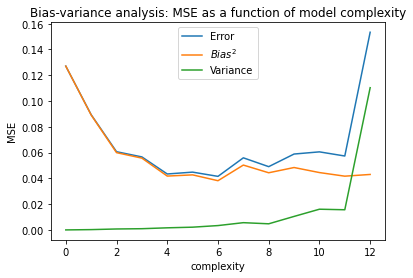

Bias-variance tradeoff analysis with variation in training and testing datapoints
Datapoints: 625 – Test size: 0.2
Error: 0.10452448148903386
Bias^2: 0.10452448148903386
Var: 0.0
0.10452448148903386 >= 0.10452448148903386 + 0.0 = 0.10452448148903386
Error: 0.0755092976458775
Bias^2: 0.07528330124073092
Var: 0.00022599640514658486
0.0755092976458775 >= 0.07528330124073092 + 0.00022599640514658486 = 0.07550929764587751
Error: 0.04699268764428983
Bias^2: 0.04645242284625922
Var: 0.0005402647980306039
0.04699268764428983 >= 0.04645242284625922 + 0.0005402647980306039 = 0.04699268764428983
Error: 0.05219974150563676
Bias^2: 0.05130823061251115
Var: 0.0008915108931256302
0.05219974150563676 >= 0.05130823061251115 + 0.0008915108931256302 = 0.052199741505636776
Error: 0.046780733719639235
Bias^2: 0.04538999000947534
Var: 0.001390743710163905
0.046780733719639235 >= 0.04538999000947534 + 0.001390743710163905 = 0.04678073371963925
Error: 0.046114445546397737
Bias^2: 0.04455662711328603
Var: 0.00

Error: 0.04709427008062085
Bias^2: 0.04568861560749101
Var: 0.001405654473129829
0.04709427008062085 >= 0.04568861560749101 + 0.001405654473129829 = 0.04709427008062084
Error: 0.04849744816950157
Bias^2: 0.04549860324044421
Var: 0.002998844929057356
0.04849744816950157 >= 0.04549860324044421 + 0.002998844929057356 = 0.048497448169501564
Error: 0.044727199772549256
Bias^2: 0.042407223867568254
Var: 0.0023199759049810087
0.044727199772549256 >= 0.042407223867568254 + 0.0023199759049810087 = 0.04472719977254926
Error: 0.04908785224748041
Bias^2: 0.04564300936001682
Var: 0.003444842887463591
0.04908785224748041 >= 0.04564300936001682 + 0.003444842887463591 = 0.04908785224748041
Error: 0.04935280145696227
Bias^2: 0.04523074538713816
Var: 0.0041220560698241055
0.04935280145696227 >= 0.04523074538713816 + 0.0041220560698241055 = 0.04935280145696226
Error: 0.05614551657534008
Bias^2: 0.04107245800919833
Var: 0.015073058566141745
0.05614551657534008 >= 0.04107245800919833 + 0.015073058566141745

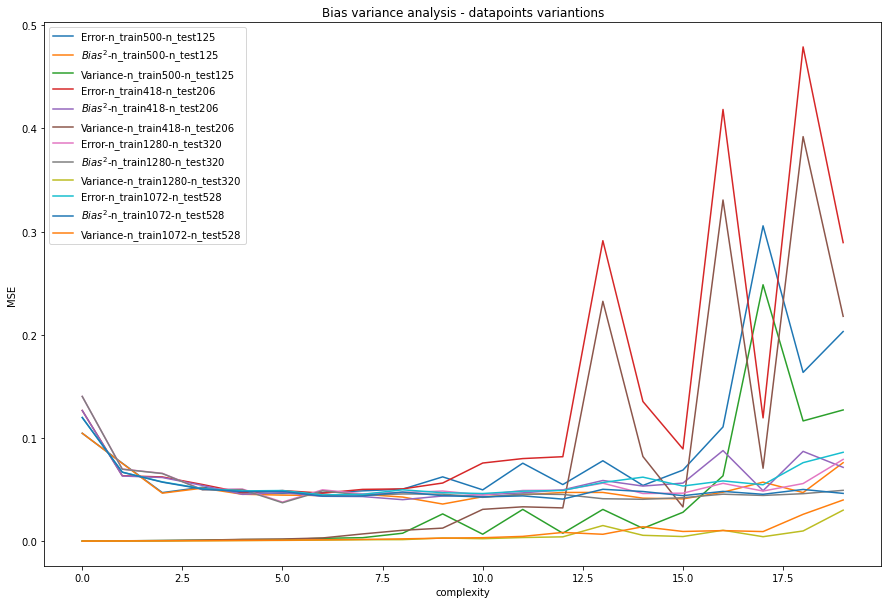

In [19]:
%run ../1project/task2.py

### Comments
<font color=purple>**comment results**</font>


<font color=purple>**MSE VS COMPLEXITY: indicate possible regions of low/high bias and variance**

**Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points**, and possibly also your training and test data using the **bootstrap** resampling method.</font>

## Exercise 3: Cross-validation as resampling techniques, adding more complexity

### Introduction


### Algorithm

Gaute
- `FrankeFunction(x,y)`:


### Results

In [ ]:
%run ../1project/task3.py

### Comments
<font color=purple>**comment results**</font>

## Exercise 4: Ridge Regression on the Franke function with resampling

### Introduction
For the OLS Regression, the formula for the optimal $\hat{\beta}$ is the following (*Ordinary Least Square Equation*):

$$\hat{\beta}_{OLS} = (X^T X)^{-1}X^T z$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{OLS}$.

### Algorithm
- `FrankeFunction(x,y)`:

### Results

In [ ]:
%run ../1project/task4.py

### Comments
<font color=purple>**comment results**
Study the dependence on $\lambda$</font>

## Exercise 5: Lasso Regression on the Franke function  with resampling

### Introduction
For the OLS Regression, the formula for the optimal $\hat{\beta}$ is the following (*Ordinary Least Square Equation*):

$$\hat{\beta}_{OLS} = (X^T X)^{-1}X^T z$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{OLS}$.

### Algorithm
- `FrankeFunction(x,y)`:

### Results

In [ ]:
%run ../1project/task5.py

### Comments
<font color=purple>**comment results**

Give  acritical discussion of the three methods and a judgement of which model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 
</font>

## Exercise 6: Analysis of real data
### Introduction


### Algorithm
- `FrankeFunction(x,y)`:


### Results


In [ ]:
%run ../1project/task6.py

### Comments
<font color=purple>**At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).**</font>

# Fred's version:

In [ ]:
import numpy as np
from random import random, seed
from regression import FrankeFunction, create_X, Split_and_Scale, OLS_solver, MSE, R2, Plot_FrankeFunction

# Create vanilla dataset:
np.random.seed(1233)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)

Plot_FrankeFunction(x,y,z, title="Original noisy dataset")


Above, we see a plot of the frankefunction with some added noise. Having $\sigma = 0.1$ seems to be a reasonable amount of noise, by looking at the plot. 

We can know create the designmatrix, for a polynomial up to the 5th order. We also want to split and scale the dataset, so we can make our model and prediction.

We do not **have** to scale this dataset as we're not working with a lot of different units. If we imagine this to be terrain data, all the data in the set could be mesured in meteres. However, we use boolean as an argument to quickly be able to enable or disable scaling. We decided to scale the data for more adaptive code that can be reused for other purposes(Adele agree?).

To create the designmatrix, as well as to split and scale out data, we run the following lines:

In [ ]:
degree=5

X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true

As we now have our training and test data seperated we can go on to find the optimal $\hat{\beta}$ values for the training set, as well as our model and prediction. We do this using **OLS_solver()** which calculates $\hat{\beta}$ through matrix inversion:

$$\hat{\beta}^{OLS} = (X^T X)^{-1}X^T z$$

Where X is the designmatrix for the traindata and z is the training datapoints from the frankefunction. To avoid problems arising from singular matrices, we use the **pinv()** function to find the psudoinverse.

This yields both our model and the prediction by
$$\tilde{z} = X \hat{\beta}$$
Where X is the designmatrix for the training data to produce our model, and the designmatrix for our test data to produce out prediction. 

We run the following line to find our result:

In [ ]:
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

As we now have our model and prediction we can go on to calculate the mean square error and the R2 score for both our model and presdiction:

Finally, we know that the confidence interval of beta can be found by:
$$var(\beta) = \sigma^2 (X^T X)^{-1}$$
Where $\sigma$ si our deviation from the dataset, and X is the designmatrix for the training data.

We can therefore calculate the confidence interval in the following way:


In [ ]:
import pandas as pd
# Confidence interval
beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec
print("––––––––––––––––––––––––––––––––––––––––––––")


Above we can see the confidence interval for our estimators with a 95% certainty. 